In [3]:
#Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
#Lendo o arquivo
try:
    df = pd.read_csv('credit_risk_dataset.csv')
    print("Arquivo carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'credit_risk_dataset.csv' não encontrado.")
    exit()

Arquivo carregado com sucesso.


In [5]:
#Observando o começo do DataFrame
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [6]:
#Observando o final do DataFrame
df.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [7]:
#Quantidade de linhas e colunas
df.shape

(32581, 12)

In [8]:
#Tipos de colunas e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
#Analise descritiva
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
#Vendo os dados nulos
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
#Vendos as duplicadas
df.duplicated().sum()

np.int64(165)

In [12]:
#Removendo registros duplicados
df.drop_duplicates(inplace=True)

In [13]:
#Tratando Outliers
df = df[df['person_age'] <= 90]
df = df[df['person_emp_length'] <= 60]

In [14]:
#Tratamento de valores nulos com a mediana
median_int_rate = df['loan_int_rate'].median()
df.fillna({'loan_int_rate':median_int_rate}, inplace=True)

In [15]:
#Tratamento de valores nulos com a mediana
median_emp = df['person_emp_length'].median()
df.fillna({'person_emp_length':median_emp}, inplace=True)

In [16]:
#Define a visualização da analise exploratória
plt.style.use('seaborn-v0_8-whitegrid')

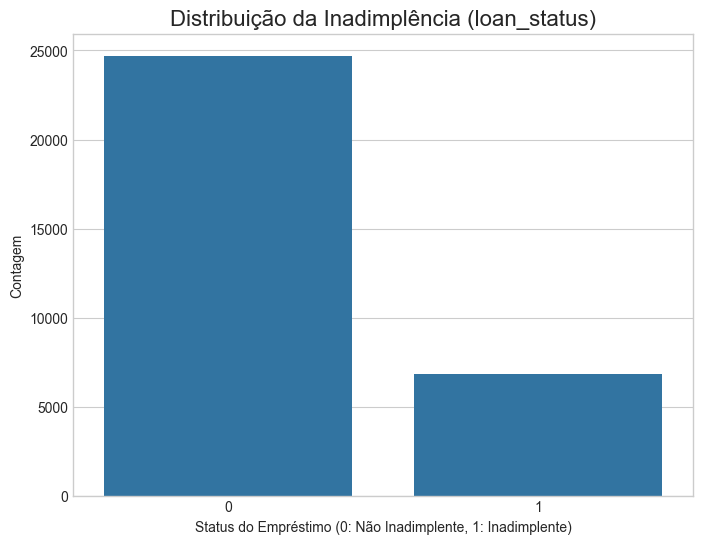

In [17]:
#Grafico para ver a distribuição dos inadimplentes (Variavel Alvo)
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribuição da Inadimplência (loan_status)', fontsize=16)
plt.xlabel('Status do Empréstimo (0: Não Inadimplente, 1: Inadimplente)')
plt.ylabel('Contagem')
plt.show()

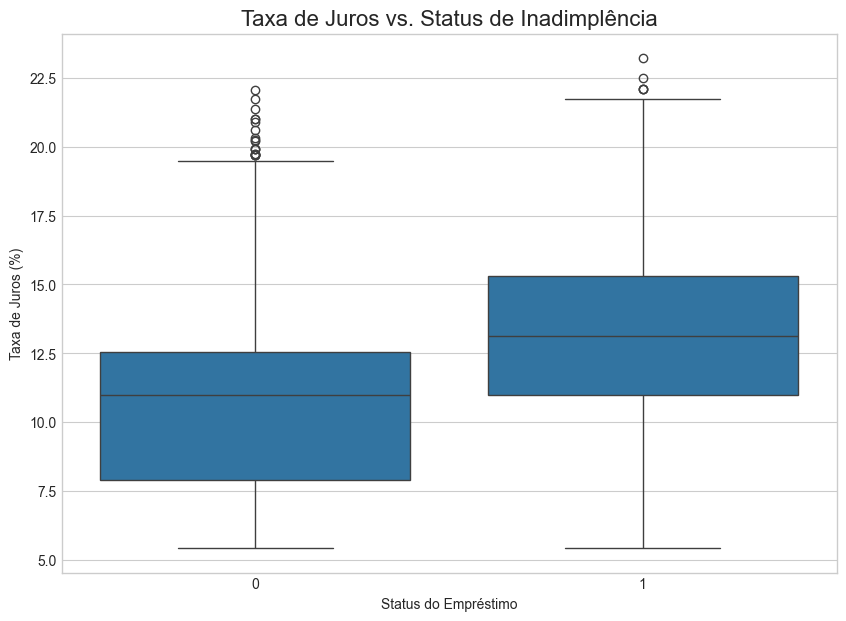

In [18]:
#Grafico para ver a relação da taxa de juros com a inadimplencia
plt.figure(figsize=(10, 7))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Taxa de Juros vs. Status de Inadimplência', fontsize=16)
plt.xlabel('Status do Empréstimo')
plt.ylabel('Taxa de Juros (%)')
plt.show()

In [19]:
# Definir as features (X) e o alvo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [20]:
# Identificar colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [21]:
numerical_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [22]:
categorical_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [23]:
# Criar o pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

In [24]:
# Dividir os dados em treino e teste, estratificando pela variável alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Criar o pipeline final com o DecisionTreeClassifier
# max_depth é um hiperparâmetro para evitar overfitting (árvores muito complexas)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(max_depth=7, random_state=42))])

In [26]:
# Treinar o modelo
model_pipeline.fit(X_train, y_train)
print("\nModelo de Árvore de Decisão treinado com sucesso!")


Modelo de Árvore de Decisão treinado com sucesso!


In [27]:
# --- 4. Avaliação do Modelo ---

# Fazer previsões no conjunto de teste
y_pred = model_pipeline.predict(X_test)


In [28]:
# Gerar e imprimir o Relatório de Classificação
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4943
           1       0.97      0.65      0.78      1362

    accuracy                           0.92      6305
   macro avg       0.94      0.82      0.87      6305
weighted avg       0.92      0.92      0.91      6305




--- Matriz de Confusão ---


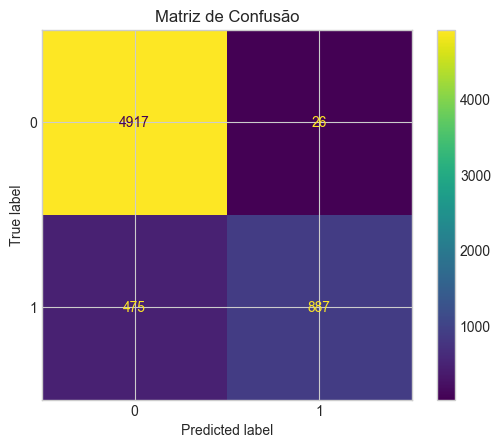

In [29]:
# Gerar e exibir a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

In [30]:
# --- 5. Interpretação e Visualização ---

# Obter nomes das features após o pré-processamento
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

In [31]:
# Obter importâncias das features
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [32]:
print("\n--- Importância das Features ---")
print(feature_importance_df.head(10))


--- Importância das Features ---
                        Feature  Importance
5           loan_percent_income    0.326077
9    person_home_ownership_RENT    0.205668
4                 loan_int_rate    0.186322
1                 person_income    0.093916
17                 loan_grade_D    0.042568
12          loan_intent_MEDICAL    0.039376
2             person_emp_length    0.036275
16                 loan_grade_C    0.030706
11  loan_intent_HOMEIMPROVEMENT    0.012397
10        loan_intent_EDUCATION    0.006349


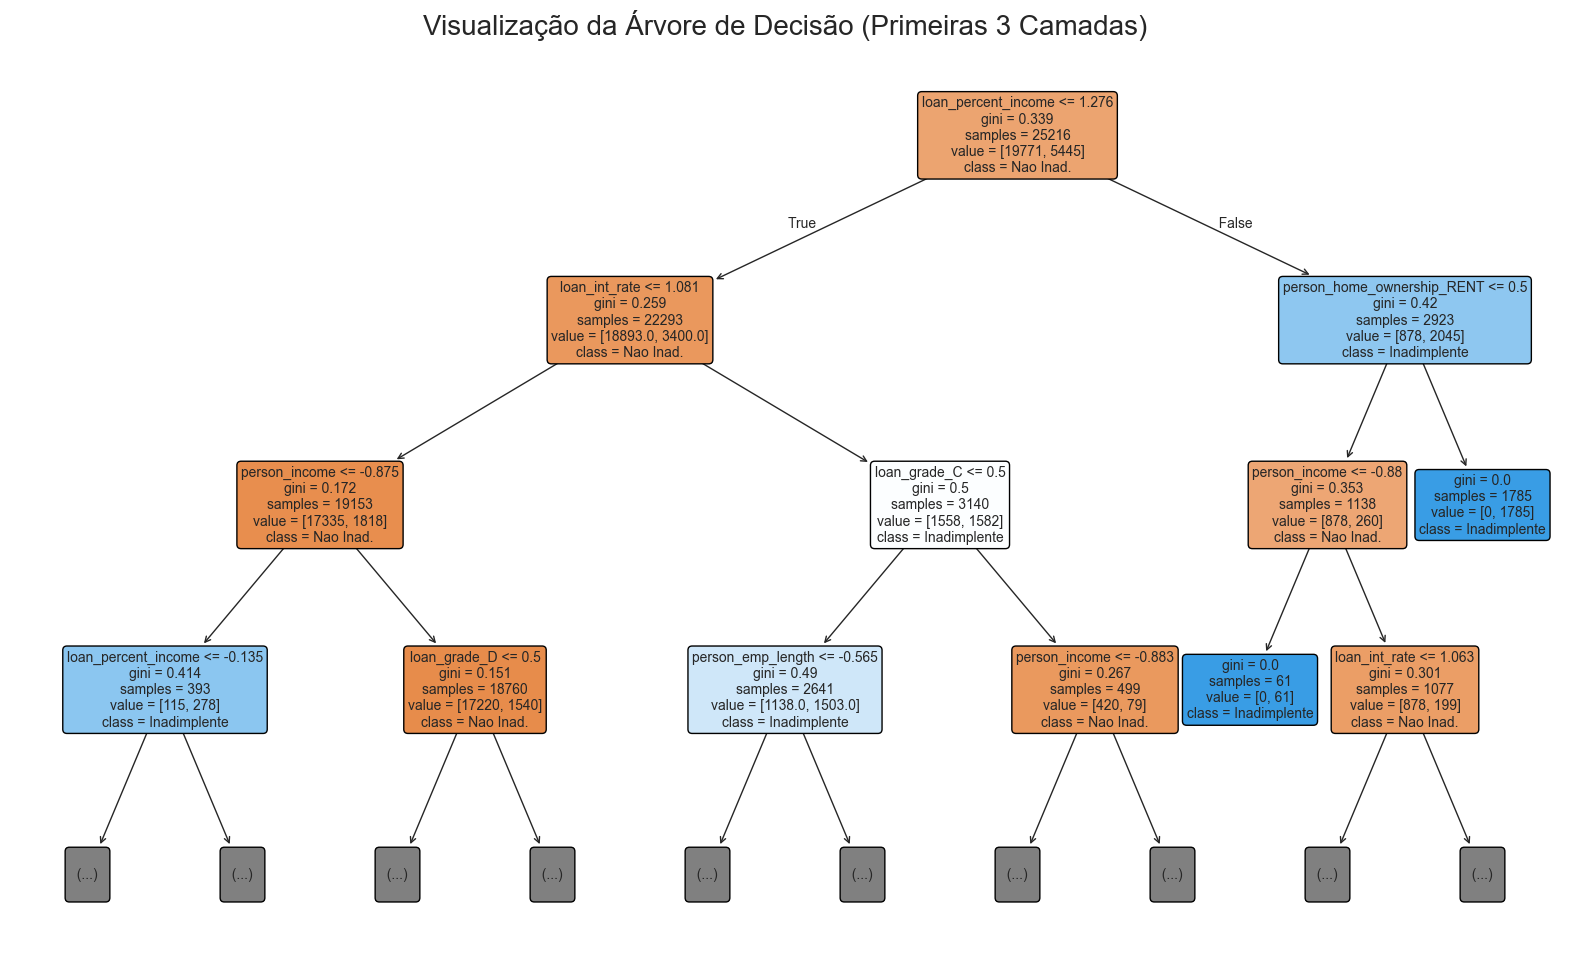

In [33]:
# Visualizar a Árvore de Decisão (as primeiras 3 camadas para legibilidade)
plt.figure(figsize=(20, 12))
plot_tree(model_pipeline.named_steps['classifier'],
          feature_names=all_feature_names,
          class_names=['Nao Inad.', 'Inadimplente'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title("Visualização da Árvore de Decisão (Primeiras 3 Camadas)", fontsize=20)
plt.show()

